In [80]:
# https://www.kaggle.com/sudalairajkumar/simple-exploration-baseline-santander-value
# http://www.real-statistics.com/correlation/
# john gidman

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Current Best Results
MAE 
1.25215689611

MSE
2.35991157196

MSE**0.5
1.53620036843

MSRLE
0.429312074414

In [81]:
df = pd.read_csv('train.csv')

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4459 entries, 0 to 4458
Columns: 4993 entries, ID to 9fc776466
dtypes: float64(1845), int64(3147), object(1)
memory usage: 169.9+ MB


In [83]:
df.describe()

,target,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
count,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,...,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4459.000000,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03
mean,5.944923e+06,1.465493e+04,1.390895e+03,2.672245e+04,4.530164e+03,2.640996e+04,3.070811e+04,1.686522e+04,4.669208e+03,2.569407e+06,...,4.676057e+05,4.446239e+05,8.056219e+05,7.812966e+05,143.529939,1.213809e+05,3.573451e+04,3.123741e+05,9.219960e+04,2.279100e+05
std,8.234312e+06,3.893298e+05,6.428302e+04,5.699652e+05,2.359124e+05,1.514730e+06,5.770590e+05,7.512756e+05,1.879449e+05,9.610183e+06,...,4.068038e+06,4.428889e+06,4.513246e+06,6.839451e+06,9584.318507,4.720709e+06,1.614622e+06,4.318501e+06,1.635993e+06,1.811139e+06
min,3.000000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.000000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.260000e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,8.000000e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+05,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,4.000000e+07,2.000000e+07,4.000000e+06,2.000000e+07,1.480000e+07,1.000000e+08,2.070800e+07,4.000000e+07,1.040000e+07,3.196120e+08,...,7.600000e+07,1.235880e+08,1.300000e+08,1.444000e+08,640000.000000,3.013120e+08,1.064200e+08,1.400000e+08,6.176800e+07,4.320000e+07


In [84]:
df['target'].head()

0    38000000.0
1      600000.0
2    10000000.0
3     2000000.0
4    14400000.0
Name: target, dtype: float64

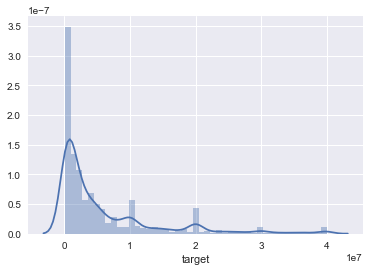

In [85]:
sns.distplot(df['target'])

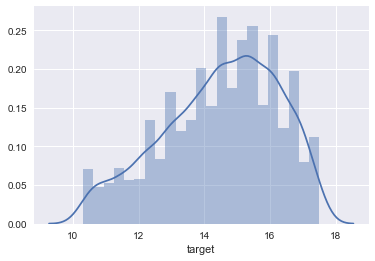

In [86]:
sns.distplot(np.log(df['target']))

In [87]:
# Find any non numeric columns df.dtypes()
# df.select_dtypes(exclude=['float64', 'int'])

In [88]:
# simple dumb linear regression model
# to get a baseline - no standardization
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

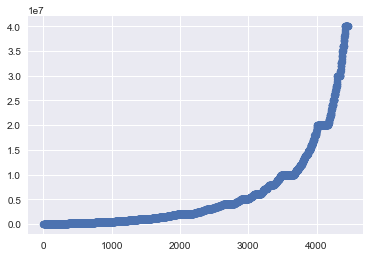

In [89]:
plt.scatter(range(df.shape[0]), np.sort(df['target'].values))

In [90]:
# Remove columns with constant values
unique_df = df.nunique().reset_index()
unique_df.columns = ["col_name", "unique_count"]
constant_df = unique_df[unique_df["unique_count"]==1]
constant_df.shape

(256, 2)

In [91]:
drop_cols = constant_df.col_name.tolist()
drop_cols.append('target')
drop_cols.append('ID')

In [92]:
X = df.drop(drop_cols, axis=1)
y = np.log1p(df['target'])

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [171]:
lm = LinearRegression()
print(y_train.iloc[0])

11.8494048444


In [144]:
lm.fit(X_train, y_train)
lm_predictions = lm.predict(X_test)

In [152]:
print(np.log1p(lm_predictions[0]))
print(lm_predictions[0])

20.0811989285
526203683.449


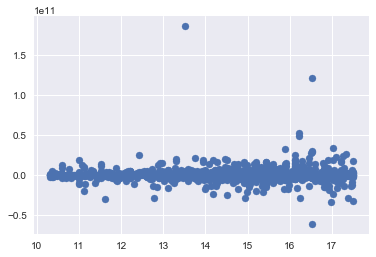

In [146]:
plt.scatter(y_test, lm_predictions)

In [150]:
from sklearn import metrics
y_test_real = np.expm1(y_test)
print(metrics.mean_absolute_error(y_test_real, lm_predictions))
print(metrics.mean_squared_error(y_test_real, lm_predictions))
print(np.sqrt(metrics.mean_squared_error(y_test_real, lm_predictions)))
print(np.log(np.sqrt(metrics.mean_squared_error(y_test_real, lm_predictions))))

2965107210.71
6.08350610094e+19
7799683391.61
22.777348979


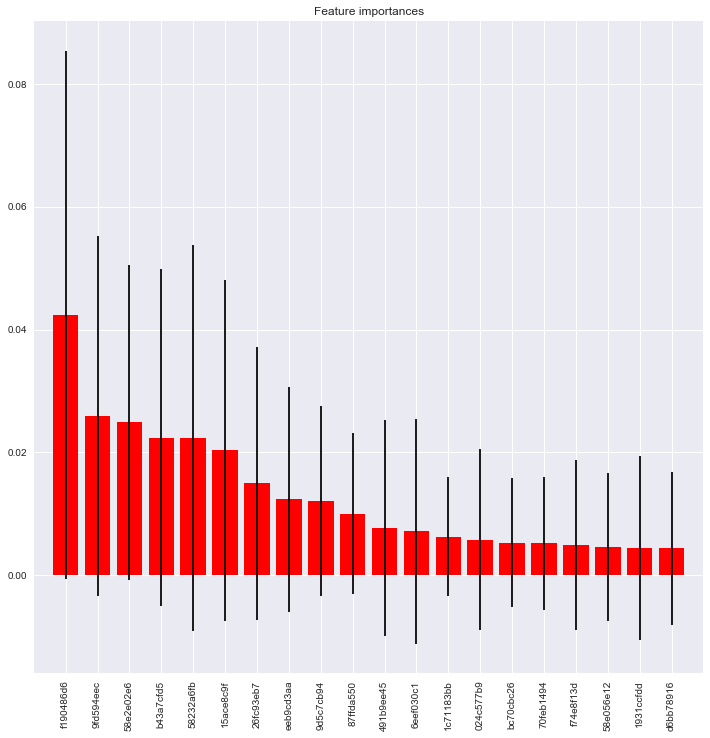

In [98]:
from sklearn import ensemble

model = ensemble.ExtraTreesRegressor(n_estimators=200, max_depth=20, max_features=0.5, n_jobs=-1, random_state=0)
model.fit(X_train, y_train)

## plot the importances ##
feat_names = X_train.columns.values
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
indices = np.argsort(importances)[::-1][:20]

plt.figure(figsize=(12,12))
plt.title("Feature importances")
plt.bar(range(len(indices)), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical')
plt.xlim([-1, len(indices)])
plt.show()

In [99]:
predictions = model.predict(X_test)

In [100]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test,predictions))
print(metrics.mean_squared_error(y_test, predictions))
print(np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print(np.log(np.sqrt(metrics.mean_squared_error(y_test, predictions))))

1.25215689611
2.35991157196
1.53620036843
0.429312074414


In [102]:
print(predictions[0])

15.210675398


In [120]:
test = pd.read_csv('test.csv')

In [121]:
test.head()

,ID,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,000137c73,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,00021489f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0004d7953,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,00056a333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,00056d8eb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [135]:
# Note: should not need to log results for tree models
model = ensemble.ExtraTreesRegressor(n_estimators=200, max_depth=20, max_features=0.5, n_jobs=-1, random_state=0)
model.fit(X, y)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=20,
          max_features=0.5, max_leaf_nodes=None, min_impurity_split=1e-07,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
          oob_score=False, random_state=0, verbose=0, warm_start=False)

In [123]:
test_drop_cols = [ col for col in drop_cols if col != 'target']
X_final_test = test.drop(test_drop_cols, axis=1)

In [136]:
test_predictions = model.predict(X_final_test)

In [137]:
final_results = np.expm1(test_predictions)

In [138]:
final_results

array([ 1346381.12502502,  1335066.71230894,  2064425.920514  , ...,
        1221046.16522377,  1199571.75285404,  1346613.78965511])

In [139]:
sub_df = pd.DataFrame({"ID":test["ID"].values})
sub_df["target"] = final_results

In [140]:
# write results sub_df.to_csv("baseline.csv", index=False)

In [173]:
importances = model.feature_importances_
# get index of top 10 most import features
indices = np.argsort(importances)[::-1][:20]

In [177]:
print(importances[4135])

0.0481489985479


In [176]:
print(indices)

[4135 2617 2378 1459 3576 4025  537 3470 4277   34 3666  834 1008 1484  853
 3784 4190 2082 2214 3727]


In [195]:
X_lim = X[feat_names[indices][0:10]]

In [197]:
print(X_lim.shape)
print(y.shape)

(4459, 10)
(4459,)


In [198]:
X_train, X_test, y_train, y_test = train_test_split(X_lim, y, test_size=0.4, random_state=101)

In [199]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [200]:
lm_predictions = lm.predict(X_test)

In [201]:
print(lm_predictions[0])

14.3860714005


In [202]:
predictions[0]

15.210675398024101